### Import libraries

In [17]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

#### Import components of statsmodels library

In [35]:
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


### Load the dataset

In [19]:
df_ts = pd.read_csv("uspopulation.csv", parse_dates=["DATE"], index_col='DATE')

In [20]:
df_ts.head()

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


In [21]:
df_ts.tail(n=10)

,PopEst
DATE,
2018-03-01,326812
2018-04-01,326968
2018-05-01,327134
2018-06-01,327312
2018-07-01,327502
2018-08-01,327698
2018-09-01,327893
2018-10-01,328077
2018-11-01,328241


In [22]:
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 2011-01-01 to 2018-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PopEst  96 non-null     int64
dtypes: int64(1)
memory usage: 1.5 KB


#### Understanding the time frequency

In [23]:
df_ts.shape

(96, 1)

In [24]:
df_ts.columns

Index(['PopEst'], dtype='object')

In [25]:
df_ts.describe()

,PopEst
count,96.000000
mean,319826.760417
std,5159.523729
min,311037.000000
25%,315419.000000
50%,319919.500000
75%,324395.250000
max,328393.000000


In [26]:
df_ts.index.to_series().diff().value_counts()

DATE
31 days    55
30 days    32
28 days     6
29 days     2
Name: count, dtype: int64

In [27]:
print(df_ts.isna().sum())

PopEst    0
dtype: int64


In [28]:
### Check for duplicates values

df = df_ts[~df_ts.index.duplicated(keep='first')]

### Handle outliers

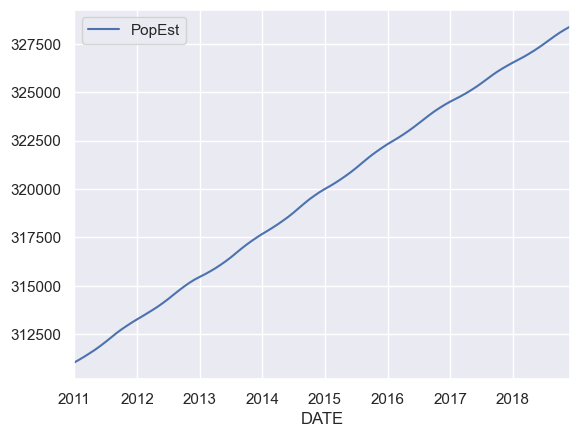

In [29]:
df.plot()
plt.show()

In [32]:
### Remove outliers
from scipy import stats
df['zscore'] = stats.zscore(df['PopEst'])
df_mod = df[df['zscore'].abs() < 3]

In [33]:
df_mod.head()

,PopEst,z_score,zscore
DATE,,,
2011-01-01,311037,-1.712542,-1.712542
2011-02-01,311189,-1.682927,-1.682927
2011-03-01,311351,-1.651364,-1.651364
2011-04-01,311522,-1.618048,-1.618048
2011-05-01,311699,-1.583562,-1.583562


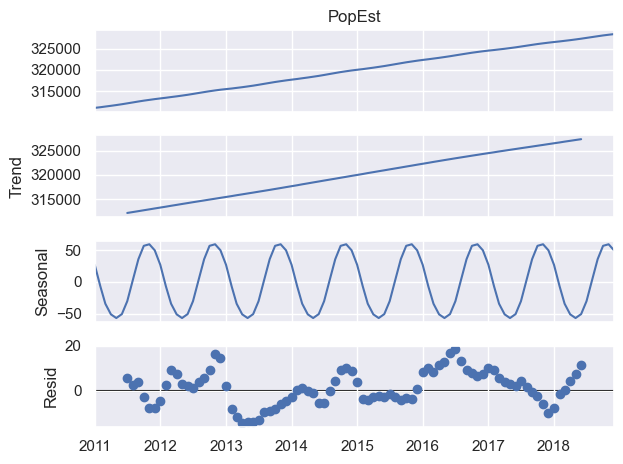

In [34]:

decomposition = seasonal_decompose(df_mod['PopEst'], model='additive')
decomposition.plot()
plt.show()


### Plot PACF and ACF

In [36]:
df_mod['diff'] = df_mod['PopEst'].diff()

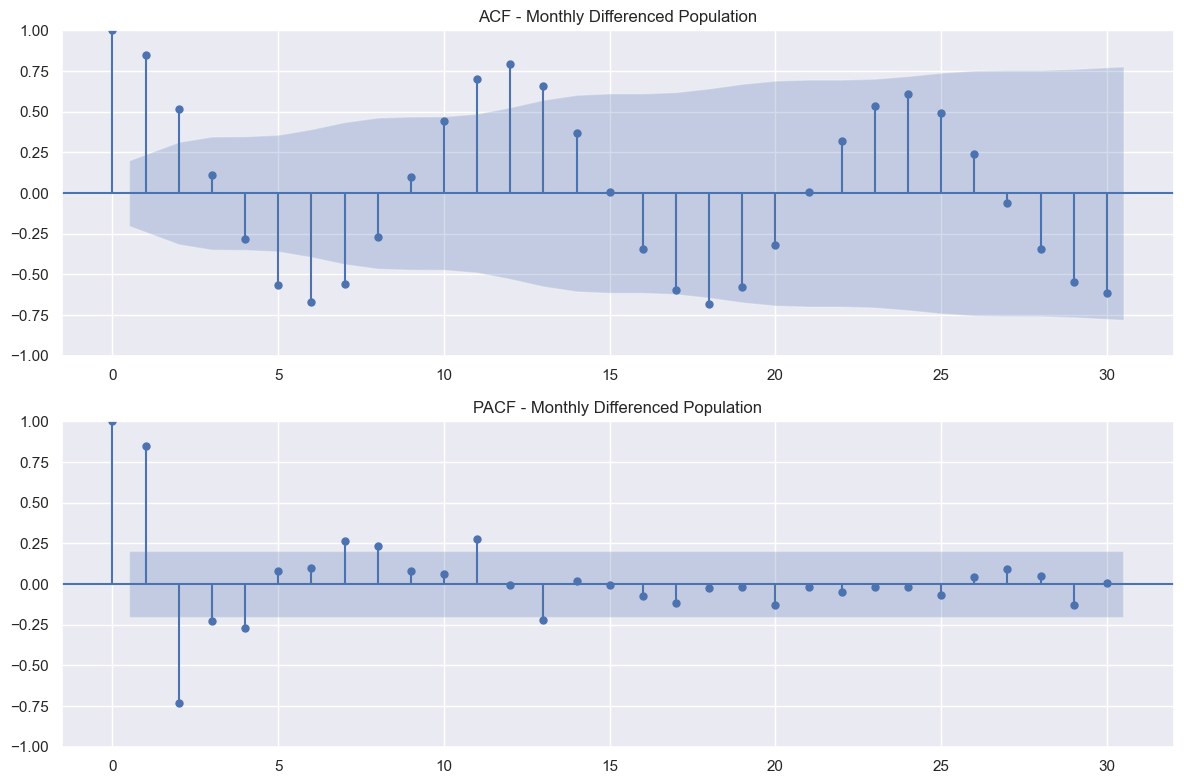

In [42]:
## Plot acf and pacf
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

# ACF
plot_acf(df_mod['diff'].dropna(), ax=ax[0], lags=30)
ax[0].set_title("ACF - Monthly Differenced Population")

# PACF plot
plot_pacf(df_mod['diff'].dropna(), ax=ax[1], lags=30, method='ywm')
ax[1].set_title("PACF - Monthly Differenced Population")

plt.tight_layout()
plt.show()